In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [52]:
# Read the dataset
df = pd.read_csv("Dataset salary 2024.csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [53]:
# describe the dataset
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [54]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [55]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [56]:
#drop salary column
df = df.drop(columns=['salary'])

In [57]:
df.shape

(16534, 10)

In [58]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
print(numeric_cols)


Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')


In [59]:
# get the range of work_year
work_year_range = df['work_year'].max() - df['work_year'].min()
work_year_range

4

In [60]:
# get the range of salary_in_usd
print("Max salary:", df['salary_in_usd'].max())
print("Min salary:", df['salary_in_usd'].min())
work_year_range = df['salary_in_usd'].max() - df['salary_in_usd'].min()
print("The range of salary_in_usd is",work_year_range)

Max salary: 800000
Min salary: 15000
The range of salary_in_usd is 785000


In [61]:
# Count the frequency of job titles
job_title_counts = df['job_title'].value_counts()
job_title_counts

job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64

In [62]:
# count the frequency of employment_type
employment_type_counts = df['employment_type'].value_counts()
employment_type_counts

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [63]:
mapping = {
    'FT': 'Full Time',
    'PT': 'Part Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

df['employment_type'] = df['employment_type'].map(mapping)


In [64]:
# count the frequency of employment_type
employment_type_counts = df['employment_type'].value_counts()
employment_type_counts

employment_type
Full Time    16454
Part Time       38
Contract        28
Freelance       14
Name: count, dtype: int64

In [65]:
# count the frequency of experience_level
experience_level_counts = df['experience_level'].value_counts() 
experience_level_counts

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

In [66]:
mapping = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior',
    'EX': 'Executive'
}

df['experience_level'] = df['experience_level'].map(mapping)


In [67]:
# count the frequency of experience_level
experience_level_counts = df['experience_level'].value_counts() 
experience_level_counts

experience_level
Senior         10670
Mid-level       4038
Entry-level     1325
Executive        501
Name: count, dtype: int64

In [68]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,Senior,Full Time,AI Engineer,USD,202730,US,0,US,M
1,2024,Senior,Full Time,AI Engineer,USD,92118,US,0,US,M
2,2024,Senior,Full Time,Data Engineer,USD,130500,US,0,US,M
3,2024,Senior,Full Time,Data Engineer,USD,96000,US,0,US,M
4,2024,Senior,Full Time,Machine Learning Engineer,USD,190000,US,0,US,M


In [69]:
df['company_location'].value_counts()

company_location
US    14518
GB      694
CA      455
ES      133
DE      105
      ...  
AM        1
QA        1
AD        1
EC        1
MD        1
Name: count, Length: 77, dtype: int64

In [70]:
pip install pycountry 

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pycountry

def code_to_country(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code   # keep the same if not found
df['employee_residence'] = df['employee_residence'].apply(code_to_country)
df['company_location'] = df['company_location'].apply(code_to_country)


In [72]:
df['company_location'].value_counts()

company_location
United States           14518
United Kingdom            694
Canada                    455
Spain                     133
Germany                   105
                        ...  
Armenia                     1
Qatar                       1
Andorra                     1
Ecuador                     1
Moldova, Republic of        1
Name: count, Length: 77, dtype: int64

In [73]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,Senior,Full Time,AI Engineer,USD,202730,United States,0,United States,M
1,2024,Senior,Full Time,AI Engineer,USD,92118,United States,0,United States,M
2,2024,Senior,Full Time,Data Engineer,USD,130500,United States,0,United States,M
3,2024,Senior,Full Time,Data Engineer,USD,96000,United States,0,United States,M
4,2024,Senior,Full Time,Machine Learning Engineer,USD,190000,United States,0,United States,M


In [74]:
country_counts = df['company_location'].value_counts().reset_index()
country_counts.columns = ['country', 'count']


In [75]:
import plotly.express as px

fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="count",
    title="🌍 Company Distribution by Country",
    color_continuous_scale="Reds",
    hover_name="country",
    hover_data={"count": True, "country": False}
)

# Improve visual appearance
fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    projection_type="natural earth"
)

# Rename colorbar label
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Number of Companies"
    ),
    title=dict(
        x=0.5,                             
        font=dict(size=22)
    ),
    margin=dict(l=0, r=0, t=60, b=0)
)

fig.show()


In [76]:
employee_counts = df['employee_residence'].value_counts().reset_index()
employee_counts.columns = ['country', 'count']


In [77]:
import plotly.express as px

fig = px.choropleth(
    employee_counts,
    locations="country",
    locationmode="country names",
    color="count",
    title="🌍 Employee Residence Distribution",
    color_continuous_scale="Reds",
    hover_name="country",
    hover_data={"count": True, "country": False}
)

# Improve map appearance
fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    projection_type="natural earth"
)

# Improve layout and colorbar
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Number of Employees"
    ),
    title=dict(
        x=0.5,  # center the title
        font=dict(size=22)
    ),
    margin=dict(l=0, r=0, t=60, b=0)
)

fig.show()


In [78]:
df['remote_ratio'].value_counts()

remote_ratio
0      11118
100     5167
50       249
Name: count, dtype: int64

Text(0.5, 0, 'Remote Ratio')

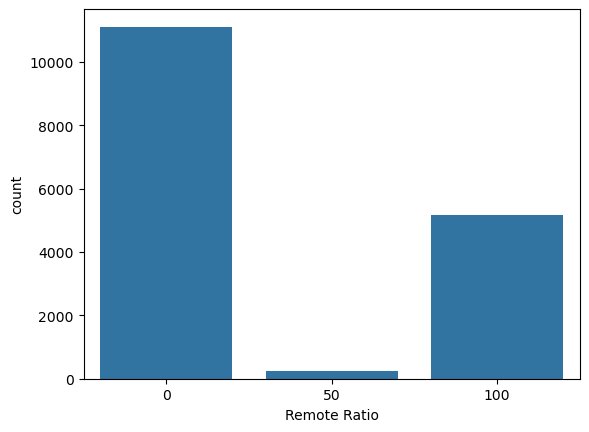

In [79]:
# plot the distribution of remote_ratio
sns.countplot(x='remote_ratio', data=df)
plt.xlabel('Remote Ratio')


In [80]:
year_counts = df['work_year'].value_counts().sort_index()


In [81]:
import plotly.express as px

# Count per work year
year_counts = df['work_year'].value_counts().sort_index()

# Convert to DataFrame
year_df = year_counts.reset_index()
year_df.columns = ['work_year', 'count']  # rename columns properly

# Plot timeline
fig = px.line(
    year_df,
    x='work_year',
    y='count',
    markers=True,
    title="Timeline of Records by Work Year"
)

fig.update_layout(
    xaxis_title="Work Year",
    yaxis_title="Number of Records",
    xaxis=dict(dtick=1)  # show every year on x-axis
)

fig.show()


In [82]:
df['job_title'].value_counts()

job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64

In [83]:
job_counts = df['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']


In [84]:
import plotly.express as px

# Count for all job titles
job_counts = df['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

# Plot
fig = px.bar(
    job_counts,
    x='count',
    y='job_title',
    orientation='h',
    text='count',
    color='count',
    color_continuous_scale='Blues',
    title="Job Title Distribution (All Titles)",
    height=2000  # increase height for many titles
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},  # largest at top
    xaxis_title="Number of Records",
    yaxis_title="Job Title",
    title={'x':0.5, 'xanchor':'center'}
)

fig.show()


In [85]:
job_counts.to_csv("job_counts.csv", index=False)


In [86]:
job_categories = {
    "AI / Machine Learning": [
        "Machine Learning Engineer", "ML Engineer", "Machine Learning Scientist",
        "MLOps Engineer", "Machine Learning Operations Engineer",
        "Machine Learning Developer", "Machine Learning Manager",
        "Machine Learning Researcher", "Machine Learning Software Engineer",
        "AI Engineer", "AI Developer", "AI Architect", "AI Programmer",
        "AI Research Engineer", "AI Scientist", "AI Software Engineer",
        "Prompt Engineer", "Deep Learning Engineer", "Applied Machine Learning Engineer",
        "Applied Machine Learning Scientist", "Computer Vision Engineer",
        "Computer Vision Software Engineer", "Machine Learning Research Engineer",
        "NLP Engineer", "Robotics Engineer", "Robotics Software Engineer",
        "Autonomous Vehicle Technician", "Deep Learning Researcher"
    ],
    
    "Data Science": [
        "Data Scientist", "Applied Scientist", "Research Scientist",
        "Data Science Engineer", "Data Science Lead", "Lead Data Scientist",
        "Principal Data Scientist", "Data Science Analyst", "Data Science Consultant",
        "Data Science Practitioner", "Data Science Tech Lead", "Managing Director Data Science",
        "Data Science Director", "Head of Data Science", "Research Analyst",
        "Quantitative Research Analyst", "Applied Data Scientist"
    ],

    "Data Engineering": [
        "Data Engineer", "Analytics Engineer", "Data Architect", "Big Data Engineer",
        "Data Developer", "Data Infrastructure Engineer", "Cloud Data Engineer",
        "Azure Data Engineer", "Software Data Engineer", "ETL Developer",
        "Data Integration Engineer", "Data Integration Specialist",
        "Data Modeller", "Data Modeler", "Principal Data Engineer"
    ],

    "Business Intelligence": [
        "Business Intelligence Engineer", "BI Developer", "BI Analyst",
        "Business Intelligence Analyst", "Business Intelligence Developer",
        "Business Intelligence Manager", "Business Intelligence Lead",
        "Director of Business Intelligence", "BI Data Analyst", "Power BI Developer"
    ],

    "Data / Analytics": [
        "Data Analyst", "Business Data Analyst", "Insight Analyst",
        "Data Visualization Specialist", "Data Reporting Analyst",
        "Product Data Analyst", "Financial Data Analyst", "Marketing Data Analyst",
        "Sales Data Analyst"
    ],

    "Management / Leadership": [
        "Head of Data", "Data Manager", "Data Operations Manager", 
        "Data Product Manager", "AI Product Manager",
        "Data Strategy Manager", "Data Quality Manager", "Analytics Engineering Manager"
    ],

    "Operations / Quality": [
        "Data Operations Engineer", "Data Operations Specialist",
        "Data Operations Analyst", "Data Operations Associate",
        "Data Quality Analyst", "Data Quality Engineer"
    ],

    "Other / Specialized": [
        "Computational Biologist", "Staff Data Scientist", "Staff Data Analyst",
        "Encounter Data Management Professional", "Admin & Data Analyst",
        "Bear Robotics"  # Treat as company-specific unknown
    ]
}


In [87]:
def categorize_job(title):
    for category, job_list in job_categories.items():
        if title in job_list:
            return category
    return "Other"


In [88]:
df['job_group'] = df['job_title'].apply(categorize_job)
group_counts = df['job_group'].value_counts()
print(group_counts.to_string())


job_group
Data Science               4619
Data Engineering           4535
Data / Analytics           2504
AI / Machine Learning      2466
Other                      1289
Business Intelligence       682
Management / Leadership     329
Operations / Quality         87
Other / Specialized          23


In [89]:
import plotly.express as px

# Make sure job_counts has job_group, job_title, count
job_counts = df.groupby(['job_group', 'job_title']).size().reset_index(name='count')

fig = px.treemap(
    job_counts,
    path=['job_group', 'job_title'],  # Hierarchy
    values='count',
    title="Job Titles by Group (Treemap)"
)

fig.show()


In [90]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group
0,2024,Senior,Full Time,AI Engineer,USD,202730,United States,0,United States,M,AI / Machine Learning
1,2024,Senior,Full Time,AI Engineer,USD,92118,United States,0,United States,M,AI / Machine Learning
2,2024,Senior,Full Time,Data Engineer,USD,130500,United States,0,United States,M,Data Engineering
3,2024,Senior,Full Time,Data Engineer,USD,96000,United States,0,United States,M,Data Engineering
4,2024,Senior,Full Time,Machine Learning Engineer,USD,190000,United States,0,United States,M,AI / Machine Learning


In [91]:
import plotly.express as px

currency_counts = df['salary_currency'].value_counts().reset_index()
currency_counts.columns = ['salary_currency', 'count']

fig = px.bar(
    currency_counts,
    x='salary_currency',
    y='count',
    title='Salary Currency Distribution',
    labels={'salary_currency': 'Currency', 'count': 'Number of Records'}
)

fig.update_layout(
    xaxis_tickangle=45
)

fig.show()


In [92]:
fig = px.violin(
    df,
    x='experience_level',
    y='salary_in_usd',
    color='experience_level',
    box=True,          # show box inside violin
    points='all',      # show all points
    title="Salary Distribution by Experience Level"
)

fig.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Salary (USD)",
    showlegend=False
)

fig.show()


In [93]:
import plotly.graph_objects as go

fig = go.Figure()

for group in df['job_group'].unique():
    fig.add_trace(go.Box(
        y=df[df['job_group'] == group]['salary_in_usd'],
        name=group,
        boxpoints='all',  # show all points
        jitter=0.5,
        pointpos=-1.8
    ))

fig.update_layout(
    title="Salary Distribution by Job Group (Box + Scatter)",
    yaxis_title="Salary (USD)",
    xaxis_title="Job Group"
)

fig.show()


In [94]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get unique company sizes and sort them
company_sizes = ['S', 'M', 'L']

# Create 1 row, 3 columns subplot
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[f"Company Size: {size}" for size in company_sizes]
)

# Add a boxplot for each company size
for i, size in enumerate(company_sizes, start=1):
    fig.add_trace(
        go.Box(
            y=df[df['company_size']==size]['salary_in_usd'],
            name=size,
            boxpoints='all',   # show all points
            jitter=0.5,
            pointpos=-1.8
        ),
        row=1, col=i
    )

# Update layout
fig.update_layout(
    height=500, width=1200,
    title_text="Salary Distribution by Company Size",
    showlegend=False
)

fig.show()


In [95]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = [
    'experience_level',
    'employment_type',
    'job_title',
    'salary_currency',
    'employee_residence',
    'company_location',
    'company_size'
]

# Dictionary to store encoders if you need to inverse transform later
label_encoders = {}

# Encode and replace the original columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store the encoder

# Check the result
df.head()


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group
0,2024,3,2,2,21,202730,85,0,75,1,AI / Machine Learning
1,2024,3,2,2,21,92118,85,0,75,1,AI / Machine Learning
2,2024,3,2,57,21,130500,85,0,75,1,Data Engineering
3,2024,3,2,57,21,96000,85,0,75,1,Data Engineering
4,2024,3,2,120,21,190000,85,0,75,1,AI / Machine Learning


In [ ]:
import numpy as np

# Calculate Q1 and Q3
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Before:", len(df))
# Filter dataset
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]


print("After:", len(df))



Before: 16534
After: 16251
Removed: 0


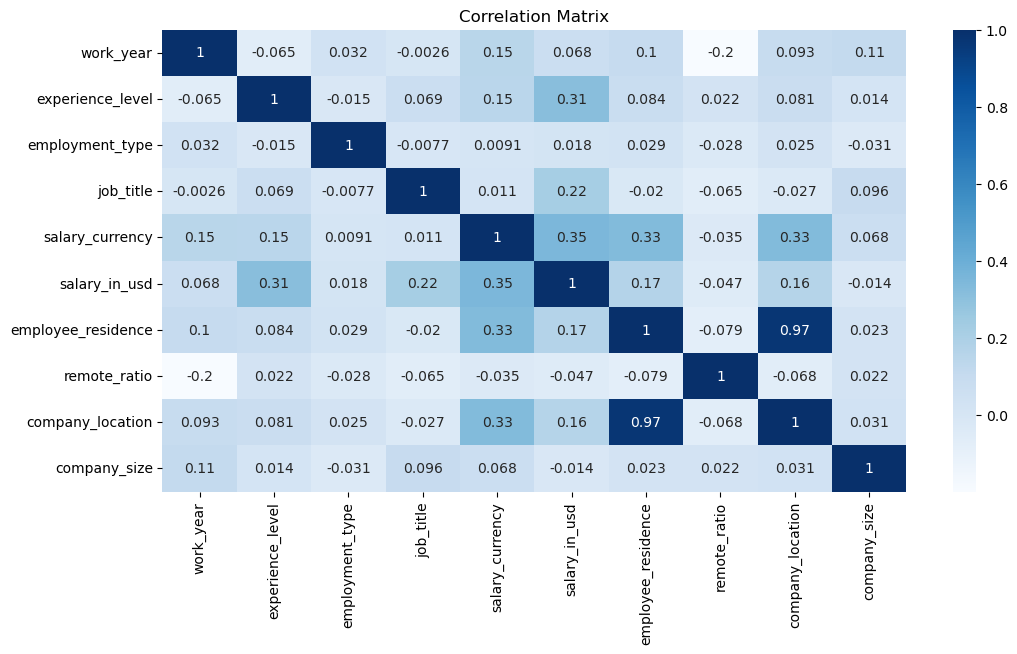

In [103]:
import pandas as pd
import plotly.express as px

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()



In [104]:
# Columns to ignore for features
ignore_cols = ['work_year', 'job_group', 'salary_in_usd','employee_residence','salary_currency']

# Features
X = df.drop(columns=ignore_cols)

# Target
y = df['salary_in_usd']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (16251, 6)
Target shape: (16251,)


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 2925156183.46
R-squared (R2): 0.14


In [99]:
import plotly.express as px
import pandas as pd

# Create a dataframe with actual and predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Scatter plot: Actual vs Predicted
fig = px.scatter(
    results, 
    x='Actual', 
    y='Predicted',
    title='Linear Regression: Actual vs Predicted Salary',
    labels={'Actual': 'Actual Salary (USD)', 'Predicted': 'Predicted Salary (USD)'},
    hover_data=['Actual', 'Predicted']
)

# Add a 45-degree reference line for perfect predictions
fig.add_shape(
    type="line",
    x0=results['Actual'].min(),
    y0=results['Actual'].min(),
    x1=results['Actual'].max(),
    y1=results['Actual'].max(),
    line=dict(color="Red", dash="dash"),
)

fig.show()


In [106]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, R2: {r2:.2f}")


RMSE: 46432.90, R2: 0.36


In [107]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Define model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

# K-Fold CV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Scoring functions
rmse_scorer = make_scorer(lambda y_true, y_pred: 
                          np.sqrt(mean_squared_error(y_true, y_pred)),
                          greater_is_better=False)

# Perform CV
rmse_scores = cross_val_score(xgb_model, X, y, scoring=rmse_scorer, cv=kfold)
r2_scores   = cross_val_score(xgb_model, X, y, scoring='r2', cv=kfold)

print(f"XGBoost Cross-Validation Results:")
print(f"Average RMSE: {-rmse_scores.mean():.2f}")
print(f"RMSE per fold: {-rmse_scores}")
print(f"Average R2: {r2_scores.mean():.3f}")
print(f"R2 per fold: {r2_scores}")


XGBoost Cross-Validation Results:
Average RMSE: 46965.16
RMSE per fold: [45848.3102694  47691.12613921 47805.00781645 46720.86131286
 46760.47175342]
Average R2: 0.375
R2 per fold: [0.37945115 0.38896551 0.35527608 0.37993865 0.36941122]
